<a href="https://colab.research.google.com/github/jrenatom/tarefa1_PL_A1/blob/main/JRM_Tarefa_BIG_A5_Clustering_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [2]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [3]:
# seu código
df.describe()


,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


In [4]:
df.isnull().sum()

Country    0
Agr        0
Min        0
Man        0
PS         0
Con        0
SI         0
Fin        0
SPS        0
TC         0
dtype: int64

In [5]:
df.columns

Index(['Country', 'Agr', 'Min', 'Man', 'PS', 'Con', 'SI', 'Fin', 'SPS', 'TC'], dtype='object')

## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [6]:
# seu código

from sklearn.preprocessing import StandardScaler

df2 = df

scaler = StandardScaler()

scaler.fit(df2.drop(columns='Country'))

X = scaler.transform(df2.drop(columns='Country'))

X[0:5]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507]])

In [7]:
df3 = pd.DataFrame(X)
df3.columns = ['Agr', 'Min', 'Man', 'PS', 'Con', 'SI', 'Fin', 'SPS', 'TC']
df3.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985


In [8]:
df3.describe()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,1.451830e-16,2.348549e-16,2.476651e-16,-3.031763e-16,8.369374e-16,1.537232e-16,3.416071e-17,-1.878839e-16,-4.697097e-16
std,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.077805e+00,-1.213035e+00,-2.780645e+00,-2.189401e+00,-3.325040e+00,-1.729156e+00,-1.271774e+00,-2.198486e+00,-2.452388e+00
25%,-7.498209e-01,-7.662337e-01,-5.832190e-01,-8.340577e-01,-3.968596e-01,-8.264284e-01,-1.008335e+00,-5.634051e-01,-6.201441e-01
50%,-3.070431e-01,-3.194325e-01,7.891927e-02,-1.563858e-01,1.144100e-01,3.214841e-01,2.361865e-01,-5.570876e-02,1.127535e-01
75%,2.980866e-01,5.741699e-01,4.645602e-01,7.245876e-01,5.017355e-01,8.731508e-01,6.994755e-01,6.125092e-01,3.875901e-01
max,3.126945e+00,1.940856e+00,2.065334e+00,2.689836e+00,2.066530e+00,1.369094e+00,2.652556e+00,1.848152e+00,2.091577e+00


## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



In [9]:
from sklearn.cluster import KMeans

X = df3

# Configura e instancia o estimador 
clf = KMeans(n_clusters = 4 , random_state= 1234)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 0 1 3 2 2 2 3 3 2 1]
[[-0.62565572 -0.42456223  0.0893139   0.13404498  0.15867575  0.82936773
   0.40489119  0.60557634  0.11275347]
 [ 2.53329475 -0.16173799 -2.13305907 -0.83405766 -2.67433341 -1.5954184
   0.79940055 -1.70572172 -2.15922902]
 [-0.17092991  1.38892502  0.87566804  0.92788914  0.16088904 -0.88772475
  -1.13551214  0.02641859  1.1937774 ]
 [ 0.72938503  0.11860786 -0.08115811 -0.65334516  0.41394168 -0.81156874
  -0.45420486 -0.86204993 -0.33920003]]


In [10]:
X.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

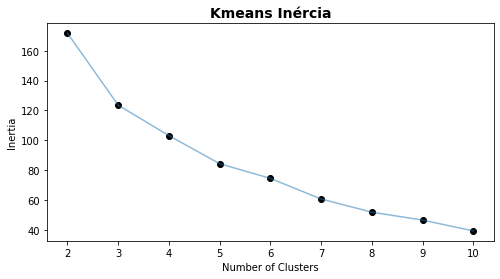

In [11]:


def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1234)
      clf.fit(X)
      inertia.append(clf.inertia_)
      
  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(2, 11) , inertia , 'ko')
  plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,2,10)

plt.show()  

In [12]:
# seu código
X = df3
X.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985


In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clt in range (2,11):
  clf = KMeans(n_clusters = n_clt, random_state= 1234) 
  clf.fit(X)
  cluster_labels = clf.labels_
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("Q1 Para n_clusters =", n_clt, "Valor médio de silhueta :", silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Q1 Para n_clusters = 2 Valor médio de silhueta : 0.3231883299459657


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Q1 Para n_clusters = 3 Valor médio de silhueta : 0.2780100590952152
Q1 Para n_clusters = 4 Valor médio de silhueta : 0.23100332807421906
Q1 Para n_clusters = 5 Valor médio de silhueta : 0.20154193028951423


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Q1 Para n_clusters = 6 Valor médio de silhueta : 0.16411112037961523
Q1 Para n_clusters = 7 Valor médio de silhueta : 0.20000069600949003
Q1 Para n_clusters = 8 Valor médio de silhueta : 0.19440554633715657


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Q1 Para n_clusters = 9 Valor médio de silhueta : 0.1816459554438654
Q1 Para n_clusters = 10 Valor médio de silhueta : 0.18062221183661056


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados. 

In [14]:
X = df3
X.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985


In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

print("\n Clusterização hierárquica (aglomerativa), ligação (linkage) ward,")
for n_clt in range (2,11):
  clf = AgglomerativeClustering(n_clusters=n_clt, linkage='ward') 
  clf.fit(X)
  cluster_labels = clf.labels_
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("Q2 Para n_clusters =", n_clt, "Valor médio de silhueta :", silhouette_avg)
  


 Clusterização hierárquica (aglomerativa), ligação (linkage) ward,
Q2 Para n_clusters = 2 Valor médio de silhueta : 0.45628411877541164
Q2 Para n_clusters = 3 Valor médio de silhueta : 0.2444034646182378
Q2 Para n_clusters = 4 Valor médio de silhueta : 0.2505096666792621
Q2 Para n_clusters = 5 Valor médio de silhueta : 0.2415785644843798
Q2 Para n_clusters = 6 Valor médio de silhueta : 0.17892619147932914
Q2 Para n_clusters = 7 Valor médio de silhueta : 0.1874661082914892
Q2 Para n_clusters = 8 Valor médio de silhueta : 0.17474530657661275
Q2 Para n_clusters = 9 Valor médio de silhueta : 0.18001792859747587
Q2 Para n_clusters = 10 Valor médio de silhueta : 0.17833543773752897


In [16]:
X = df3

print("\n Clusterização hierárquica (aglomerativa), ligação (linkage): complete,")
for n_clt in range (2,11):
  clf = AgglomerativeClustering(n_clusters=n_clt, linkage='complete') 
  clf.fit(X)
  cluster_labels = clf.labels_
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("Q2 Para n_clusters =", n_clt, "Valor médio de silhueta :", silhouette_avg)


 Clusterização hierárquica (aglomerativa), ligação (linkage): complete,
Q2 Para n_clusters = 2 Valor médio de silhueta : 0.45628411877541164
Q2 Para n_clusters = 3 Valor médio de silhueta : 0.22650355747606257
Q2 Para n_clusters = 4 Valor médio de silhueta : 0.20574356577767894
Q2 Para n_clusters = 5 Valor médio de silhueta : 0.1925679650869275
Q2 Para n_clusters = 6 Valor médio de silhueta : 0.20669960034832277
Q2 Para n_clusters = 7 Valor médio de silhueta : 0.18694928076675185
Q2 Para n_clusters = 8 Valor médio de silhueta : 0.17387818733003885
Q2 Para n_clusters = 9 Valor médio de silhueta : 0.160628628264224
Q2 Para n_clusters = 10 Valor médio de silhueta : 0.15160115193976537


In [17]:
X = df3

print("\n Clusterização hierárquica (aglomerativa), ligação (linkage): single,")
for n_clt in range (2,11):
  clf = AgglomerativeClustering(n_clusters=n_clt, linkage='single') 
  clf.fit(X)
  cluster_labels = clf.labels_
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("Q2 Para n_clusters =", n_clt, "Valor médio de silhueta : ", silhouette_avg)


 Clusterização hierárquica (aglomerativa), ligação (linkage): single,
Q2 Para n_clusters = 2 Valor médio de silhueta :  0.4607323596885198
Q2 Para n_clusters = 3 Valor médio de silhueta :  0.3883204419619063
Q2 Para n_clusters = 4 Valor médio de silhueta :  0.13372548957223512
Q2 Para n_clusters = 5 Valor médio de silhueta :  0.21129406158943048
Q2 Para n_clusters = 6 Valor médio de silhueta :  0.12846081922827107
Q2 Para n_clusters = 7 Valor médio de silhueta :  0.10100205257975982
Q2 Para n_clusters = 8 Valor médio de silhueta :  0.08577247007571913
Q2 Para n_clusters = 9 Valor médio de silhueta :  0.12616031465198377
Q2 Para n_clusters = 10 Valor médio de silhueta :  0.05644169156558999


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*. 

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



In [18]:
X = df3
X.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985


In [19]:
clf = AgglomerativeClustering(n_clusters=2, linkage='single') 
clf.fit(X)
cluster_labels = clf.labels_
silhouette_avg = silhouette_score(X, cluster_labels)
print("Q2 Para n_clusters =", 2, "Valor médio de silhueta :", silhouette_avg)

Q2 Para n_clusters = 2 Valor médio de silhueta : 0.4607323596885198


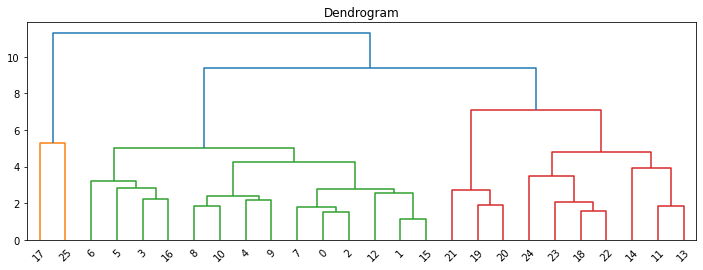

In [20]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(12,4),sharey=True)

ax.set_title("Dendrogram")
plt.xticks(rotation=90)  

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))  
ax.axhline(y=30, color='r', linestyle='--')

plt.show()

In [21]:
# seu código
# Ex para 2 clusters

X = df3

clf = AgglomerativeClustering(n_clusters=2)  
clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


In [22]:
# seu código
df['Cluster'] = labels
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,0
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,0
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,0
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,0
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,0


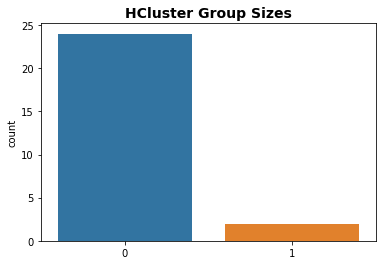

In [23]:
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

In [24]:
# seu código
# Ex para 3 clusters

X = df3

clf = AgglomerativeClustering(n_clusters=3)  
clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 1 0 0 0 0 0 0 0 1]


In [25]:
# seu código
df['Cluster'] = labels
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,2
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,2
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,2
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,2


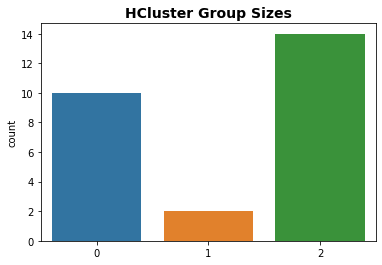

In [26]:
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



In [27]:
# seu código
# seu código
# Ex para 3 clusters

X = df3

clf = KMeans(n_clusters = 3, random_state= 1234) 
clf.fit(X)
labels = clf.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# seu código
df['Cluster'] = labels
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1


In [29]:
# seu código
df.groupby('Cluster').mean()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,52.300000,0.933333,14.100000,0.600000,5.266667,7.700000,4.933333,9.400000,4.633333
1,11.562500,0.812500,27.481250,0.918750,8.612500,16.031250,5.175000,22.850000,6.562500
2,22.214286,2.400000,31.457143,1.014286,8.385714,8.185714,0.914286,18.114286,7.328571


In [30]:
df.Country[df.Cluster == 0]

11        Greece
17        Turkey
25    Yugoslavia
Name: Country, dtype: object

In [31]:
df.groupby('Cluster').mean()/df.groupby('Cluster').mean().sum()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,0.607597,0.225126,0.193049,0.236870,0.236546,0.241251,0.447565,0.186640,0.250120
1,0.134328,0.195980,0.376258,0.362707,0.386820,0.502280,0.469489,0.453695,0.354262
2,0.258075,0.578894,0.430693,0.400423,0.376634,0.256469,0.082946,0.359665,0.395617
